In [22]:
import pandas as pd
import Function_garch as fg
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("/Users/sebastiencaron/RSDC/In_Sample_Pelletier.xlsx")

diff_df = df.apply(fg.logf_diff)
print(diff_df)
colname = diff_df.columns




      GBP/USD    DM/USD   JPY/USD   CHF/USD
1    0.355532 -1.858418 -0.473690 -2.179853
2   -1.425409 -2.327800 -1.390903 -1.963671
3    0.443940  1.106364  0.797790  0.868769
4   -1.025650 -1.465883 -0.719036 -1.638514
5   -1.677579 -0.437657  0.152955 -0.400481
..        ...       ...       ...       ...
941 -0.428767 -0.143383  0.229390 -0.011710
942  0.093392  0.162920  0.108475  0.323480
943 -0.891444 -0.899360 -0.200973 -1.233254
944  0.945963  0.331251  0.112595  0.745686
945 -2.188406 -1.006985 -0.185044 -0.863936

[945 rows x 4 columns]


In [6]:
df_result = pd.DataFrame()

for i in range(len(colname)):
    tmp = fg.generer_estime(np.array(diff_df.iloc[:,i]))
    df_result.insert(i, colname[i], value = tmp)
    
df_result

/Users/sebastiencaron/RSDC/Function_garch.py:58: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )
/Users/sebastiencaron/RSDC/Function_garch.py:58: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )
/Users/sebastiencaron/RSDC/Function_garch.py:58: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/Users/sebastiencaron/RSDC/Function_garch.py:58: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )


,GBP/USD,DM/USD,JPY/USD,CHF/USD
0,"[0.0082, 0.0896, 0.8992]","[0.0185, 0.1059, 0.863]","[0.0035, 0.0281, 0.9616]","[0.0562, 0.1114, 0.7999]"
1,"[0.7301, 0.676, 0.7981, 0.7435, 0.771, 0.9535,...","[0.5953, 0.898, 1.3675, 1.3283, 1.3925, 1.2406...","[0.3395, 0.3362, 0.3812, 0.388, 0.3911, 0.3802...","[0.6341, 1.093, 1.3602, 1.2283, 1.3379, 1.1443..."
2,"[0.4161, -1.7337, 0.4969, -1.1895, -1.9106, -0...","[-2.4087, -2.4564, 0.9461, -1.2719, -0.3709, -...","[-0.813, -2.3988, 1.2921, -1.1544, 0.2446, -1....","[-2.7374, -1.8783, 0.7449, -1.4784, -0.3462, -..."


0                              [0.0185, 0.1059, 0.863]
1    [0.5953, 0.898, 1.3675, 1.3283, 1.3925, 1.2406...
2    [-2.4087, -2.4564, 0.9461, -1.2719, -0.3709, -...
Name: DM/USD, dtype: object

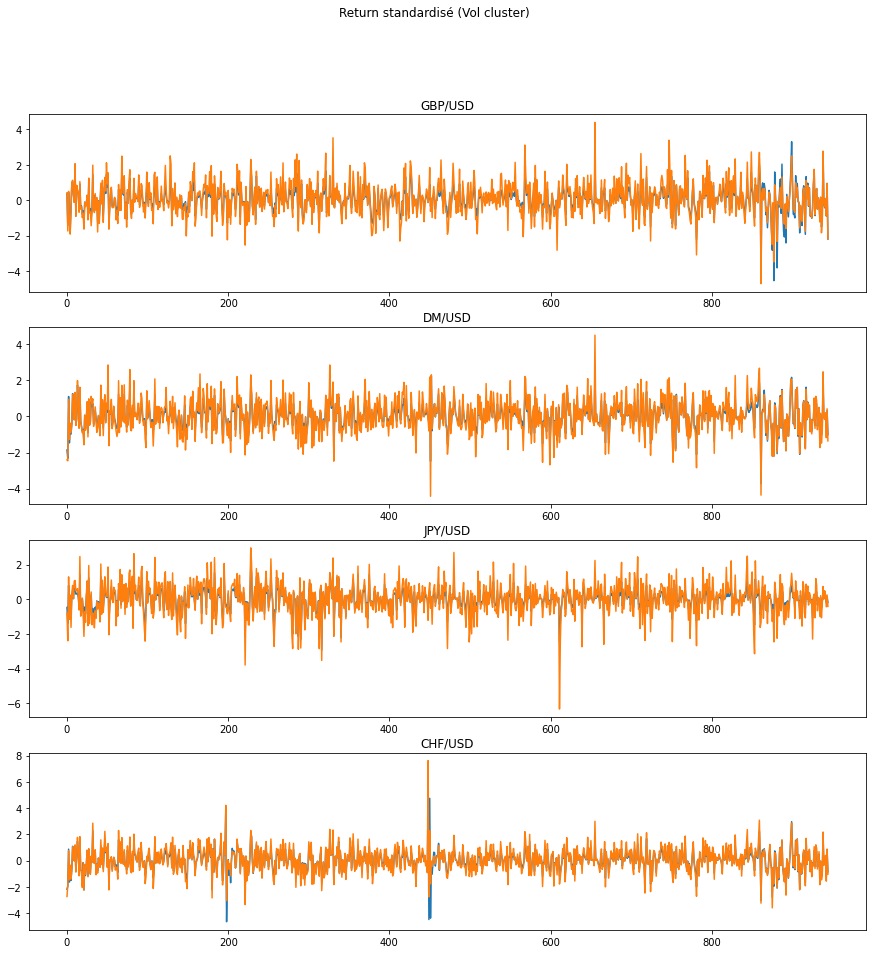

In [21]:
fig, axs = plt.subplots(len(colname), figsize=(15, 15))
fig.suptitle('Return standardisé (Vol cluster)')
x = range(len(diff_df.iloc[:,0]))

for i in range(len(colname)):
    
    period = i
    ret_std = df_result.iloc[2,period]
    ret = diff_df.iloc[:,period]
    
#Ploting
    axs[i].plot(x, ret)
    axs[i].plot(x, ret_std) 
    axs[i].set_title(colname[i])
    

df_result.iloc[:,1]
    

In [19]:
df_result.iloc[2,0]
diff_df.iloc[:,0]


pd.DataFrame({"return": diff_df.iloc[:,0], "sigma": df_result.iloc[1,0], "std_ret": df_result.iloc[2,0]})




,return,sigma,std_ret
1,0.355532,0.7301,0.4161
2,-1.425409,0.6760,-1.7337
3,0.443940,0.7981,0.4969
4,-1.025650,0.7435,-1.1895
5,-1.677579,0.7710,-1.9106
...,...,...,...
941,-0.428767,1.2392,-0.3852
942,0.093392,1.1389,0.0875
943,-0.891444,1.0331,-0.8770
944,0.945963,1.0084,0.9420


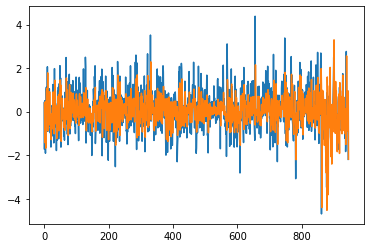

In [20]:
plt.plot(df_result.iloc[2,0])
plt.plot(diff_df.iloc[:,0])